In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mhdataset/train.csv
/kaggle/input/mhdataset/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/mhdataset/train.csv")
test_data = pd.read_csv("/kaggle/input/mhdataset/test.csv")

train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
# 1. Calculate Pressure score
def handle_nan(x):
    return 0 if pd.isna(x) else x

# Calculate pressure by combining Academic and Work pressure
train_data['Pressure'] = train_data['Academic Pressure'].apply(handle_nan) + train_data['Work Pressure'].apply(handle_nan)

# Map pressure to binary categories
#train_data['Pressure'] = train_data['Pressure'].apply(lambda x: 0 if x < 5 else 1)

# 2. Calculate Satisfaction score
# Calculate satisfaction by combining Study and Job satisfaction
train_data['Satisfaction'] = train_data['Study Satisfaction'].apply(handle_nan) + train_data['Job Satisfaction'].apply(handle_nan)

# Map satisfaction to binary categories
#train_data['Satisfaction'] = train_data['Satisfaction'].apply(lambda x: 0 if x < 5 else 1)

#train_data = train_data.drop(columns=["Satification"])

train_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


                          id       Age  Academic Pressure  Work Pressure  \
id                  1.000000  0.001850           0.005597       0.003086   
Age                 0.001850  1.000000          -0.075956      -0.098924   
Academic Pressure   0.005597 -0.075956           1.000000            NaN   
Work Pressure       0.003086 -0.098924                NaN       1.000000   
CGPA               -0.011869  0.005129          -0.025195            NaN   
Study Satisfaction  0.007824  0.008862          -0.112228            NaN   
Job Satisfaction    0.002774  0.030793          -1.000000      -0.036958   
Work/Study Hours    0.002359 -0.118356           0.095650      -0.002808   
Financial Stress   -0.000340 -0.083589           0.152105       0.024412   
Depression          0.003944 -0.564671           0.475037       0.216634   
Pressure            0.003491 -0.099685           1.000000       1.000000   
Satisfaction        0.003771  0.027692          -0.112401      -0.036966   

           

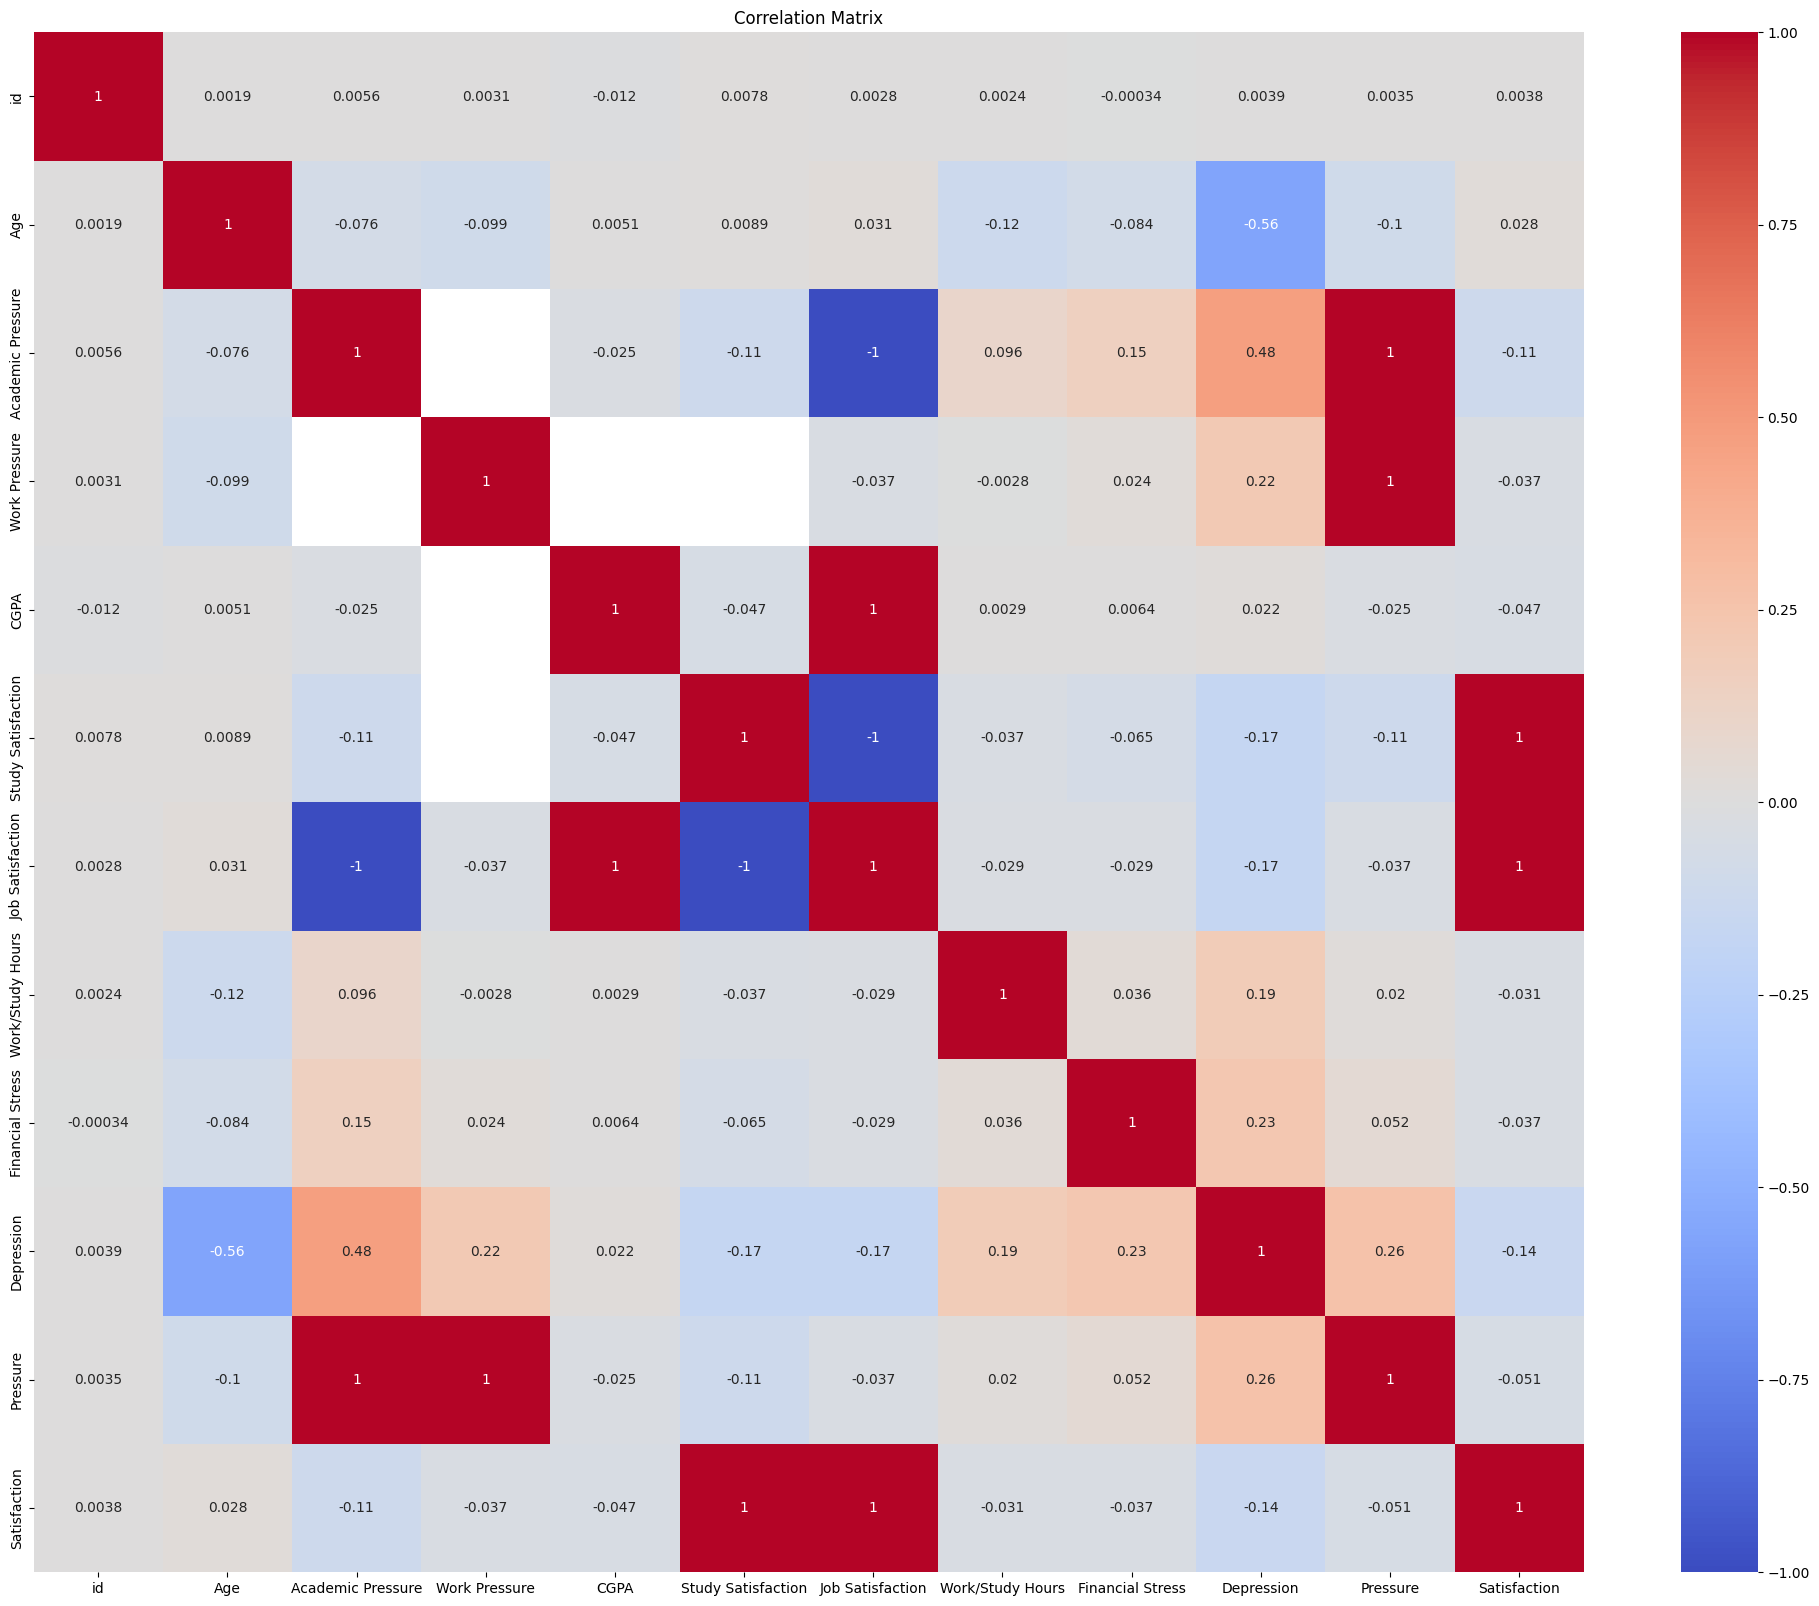

In [4]:
import matplotlib.pyplot as plt  # correct import
import seaborn as sns

print(train_data.corr(numeric_only=True))
# Displaying heatmap

# Create correlation matrix heatmap
plt.figure(figsize=(25,20))
sns.heatmap(train_data.corr(numeric_only=True), 
            annot=True,  # Show numbers
            cmap='coolwarm',  # Color scheme
            center=0)  # Center the colormap at 0
plt.title('Correlation Matrix')
plt.show()

PREPROCESSING

-Have to change some non numerical features to numericals for further analysis.

In [5]:
categorical_cols = ["Name"]

# First, let's create the encoding mappings
gender_map = {'Female': 0, 'Male': 1}

profession_status_map = {'Student': 0, 'Working Professional': 1}

suicidal_thoughts_map = {'No': 0, 'Yes': 1}

dietary_habits_map = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}

family_history_map = {'No': 0, 'Yes': 1}

train_data['Gender'] = train_data['Gender'].map(gender_map)
train_data['Working Professional or Student'] = train_data['Working Professional or Student'].map(profession_status_map)
train_data['Have you ever had suicidal thoughts ?'] = train_data['Have you ever had suicidal thoughts ?'].map(suicidal_thoughts_map)
train_data['Dietary Habits'] = train_data['Dietary Habits'].map(dietary_habits_map)
train_data['Family History of Mental Illness'] = train_data['Family History of Mental Illness'].map(family_history_map)

# Apply one-hot encoding to categorical features
train_data = pd.get_dummies(train_data, columns=categorical_cols, dtype='int', drop_first=True)

# Print the first few rows to verify the encoding
print(train_data.head())

   id  Gender   Age           City  Working Professional or Student  \
0   0       0  49.0       Ludhiana                                1   
1   1       1  26.0       Varanasi                                1   
2   2       1  33.0  Visakhapatnam                                0   
3   3       1  22.0         Mumbai                                1   
4   4       0  30.0         Kanpur                                1   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  ...  Name_Yamini Name_Yash  Name_Yashvi Name_Yogesh  \
0                 NaN  ...            0         0            0           0   
1                 NaN  ...            

In [6]:
categorical_cols = ["Name"]

# First, let's create the encoding mappings
gender_map = {'Female': 0, 'Male': 1}

profession_status_map = {'Student': 0, 'Working Professional': 1}

suicidal_thoughts_map = {'No': 0, 'Yes': 1}

dietary_habits_map = {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}

family_history_map = {'No': 0, 'Yes': 1}

test_data['Gender'] = test_data['Gender'].map(gender_map)
test_data['Working Professional or Student'] = test_data['Working Professional or Student'].map(profession_status_map)
test_data['Have you ever had suicidal thoughts ?'] = test_data['Have you ever had suicidal thoughts ?'].map(suicidal_thoughts_map)
test_data['Dietary Habits'] = test_data['Dietary Habits'].map(dietary_habits_map)
test_data['Family History of Mental Illness'] = test_data['Family History of Mental Illness'].map(family_history_map)


# Print the first few rows to verify the encoding
print(test_data.head())

       id     Name  Gender   Age           City  \
0  140700   Shivam       1  53.0  Visakhapatnam   
1  140701    Sanya       0  58.0        Kolkata   
2  140702     Yash       1  53.0         Jaipur   
3  140703   Nalini       0  23.0         Rajkot   
4  140704  Shaurya       1  47.0         Kalyan   

   Working Professional or Student              Profession  Academic Pressure  \
0                                1                   Judge                NaN   
1                                1  Educational Consultant                NaN   
2                                1                 Teacher                NaN   
3                                0                     NaN                5.0   
4                                1                 Teacher                NaN   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            2.0   NaN                 NaN               5.0   
1            2.0   NaN                 NaN               4.0   
2            4

                                       id    Gender       Age  \
id                               1.000000 -0.003634  0.001850   
Gender                          -0.003634  1.000000 -0.006890   
Age                              0.001850 -0.006890  1.000000   
Working Professional or Student -0.001134 -0.006657  0.584984   
Academic Pressure                0.005597 -0.022192 -0.075956   
...                                   ...       ...       ...   
Name_Yuvraj                     -0.000524  0.065249  0.006225   
Name_Zahra                      -0.001132 -0.002951  0.001639   
Name_Zara                       -0.000106 -0.077188  0.018245   
Name_Zegmay                     -0.000139  0.002409  0.001208   
Name_Zoya                        0.000926 -0.044980  0.009899   

                                 Working Professional or Student  \
id                                                     -0.001134   
Gender                                                 -0.006657   
Age            

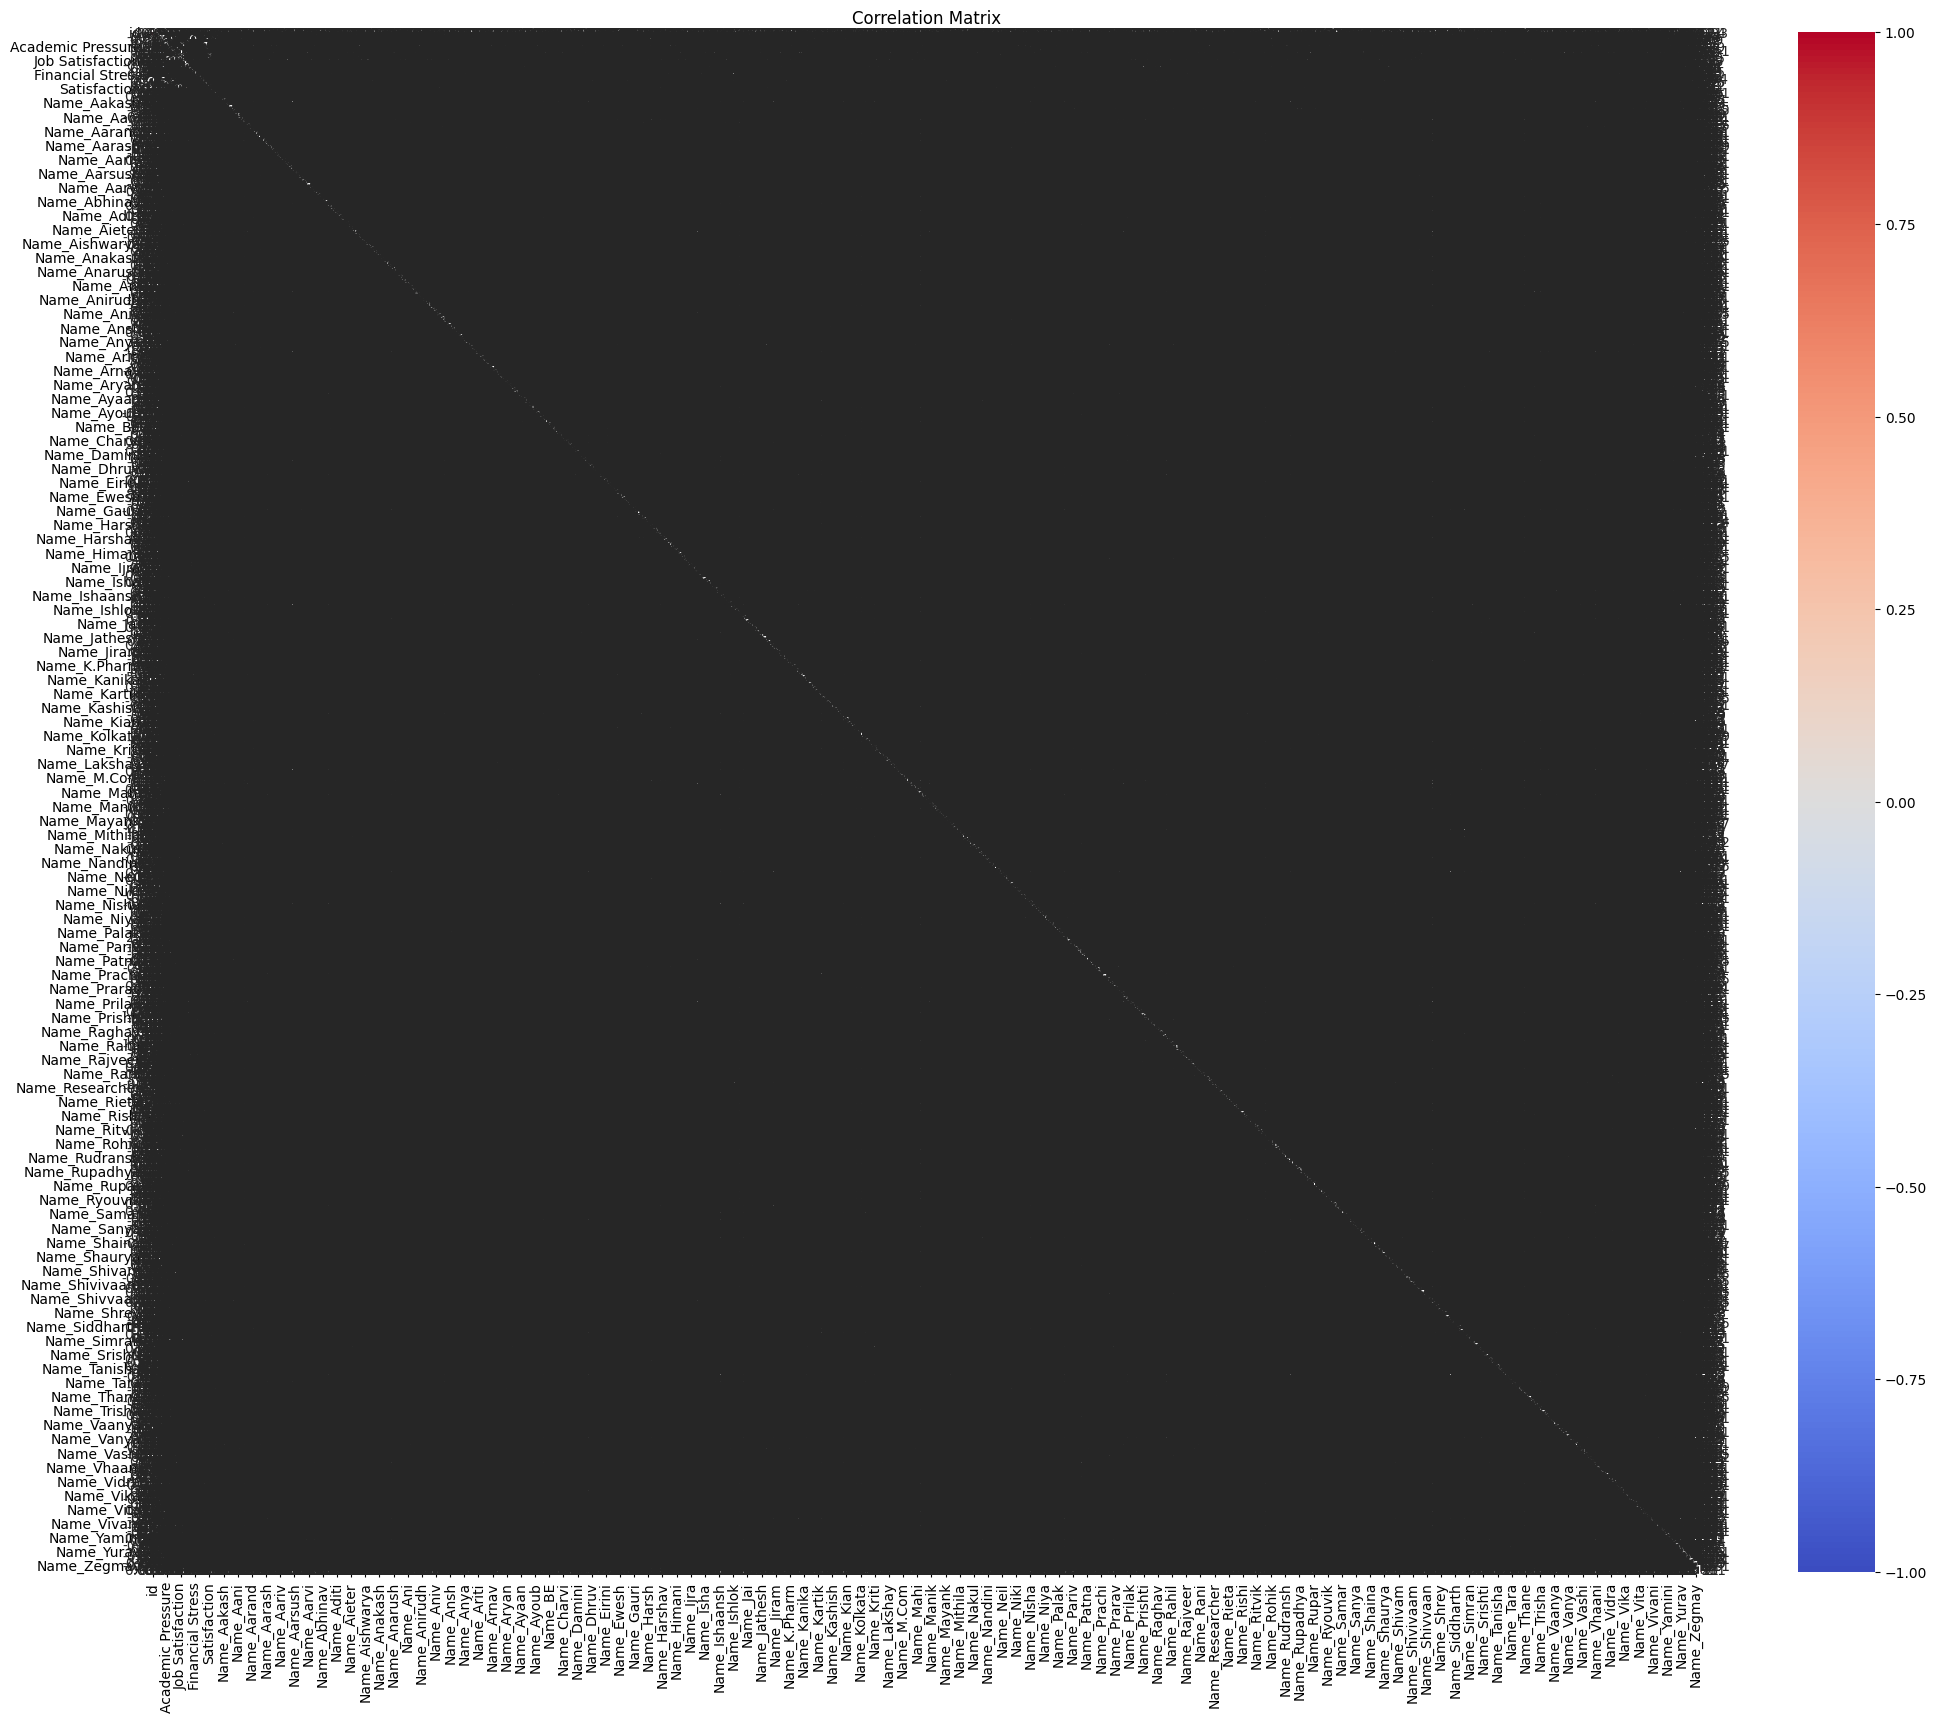

In [7]:
import matplotlib.pyplot as plt  # correct import
import seaborn as sns

print(train_data.corr(numeric_only=True))
# Displaying heatmap

# Create correlation matrix heatmap
plt.figure(figsize=(25,20))
sns.heatmap(train_data.corr(numeric_only=True), 
            annot=True,  # Show numbers
            cmap='coolwarm',  # Color scheme
            center=0)  # Center the colormap at 0
plt.title('Correlation Matrix')
plt.show()

Build the model.

Training MSE: 0.06675680077158683
Testing MSE: 0.06695021278241088
Training R2 Score: 0.5503489123855811
Testing R2 Score: 0.5525007299427628


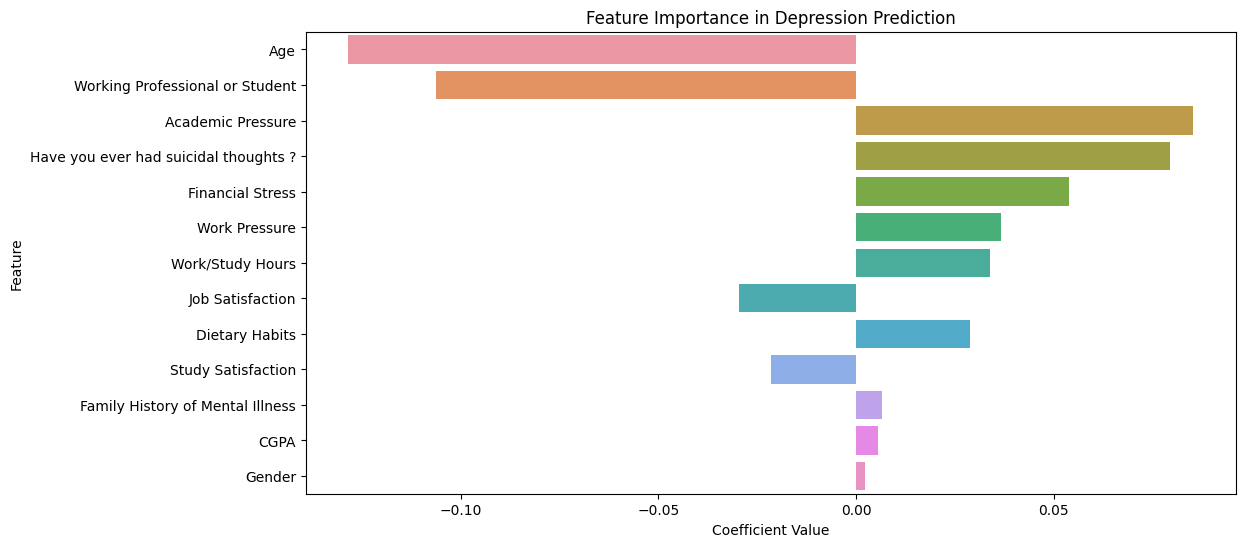

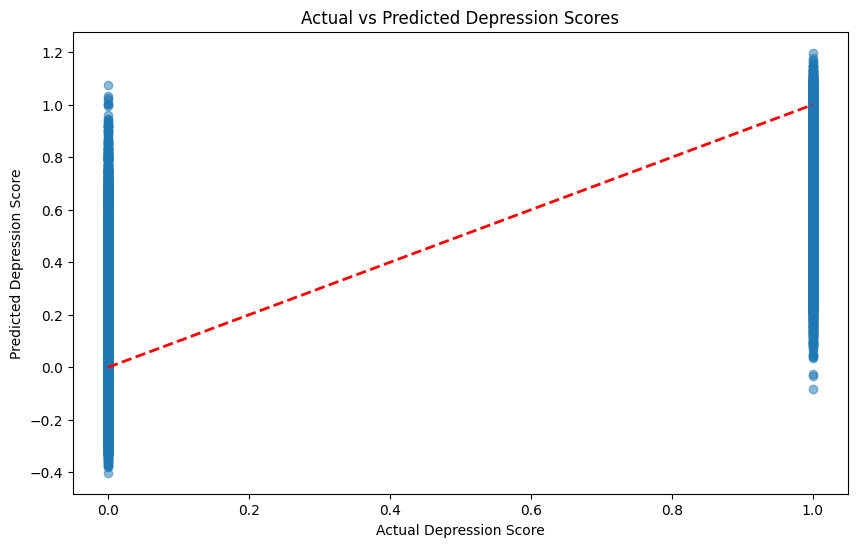

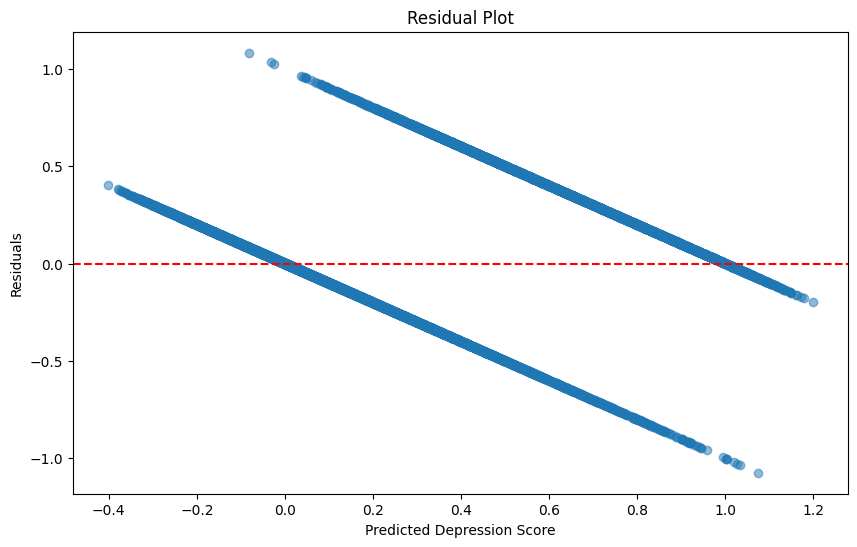


Cross-validation scores: [0.55199981 0.55134595 0.55177715 0.55614193 0.53933407]
Average CV score: 0.5501197814352773
CV score std: 0.005663617179821172

Model Summary:
--------------------------------------------------
Number of features: 13
Training set size: 112560
Test set size: 28140

Model Coefficients:
Age: -0.1286
Academic Pressure: 0.0854
Work Pressure: 0.0368
CGPA: 0.0055
Study Satisfaction: -0.0214
Job Satisfaction: -0.0297
Work/Study Hours: 0.0339
Financial Stress: 0.0539
Gender: 0.0022
Working Professional or Student: -0.1064
Have you ever had suicidal thoughts ?: 0.0794
Dietary Habits: 0.0289
Family History of Mental Illness: 0.0067
Intercept: 0.1814


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Depression' is your target variable
# First, let's prepare the data by selecting relevant numerical features
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
           'Study Satisfaction', 'Job Satisfaction',
           'Work/Study Hours', 'Financial Stress', 'Gender',
           'Working Professional or Student', 'Have you ever had suicidal thoughts ?',
           'Dietary Habits', 'Family History of Mental Illness']

# Select features and target
X = train_data[features].copy()
y = train_data['Depression']

# Handle missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)


print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Testing R2 Score:", test_r2)

# Create a dataframe of feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Depression Prediction')
plt.xlabel('Coefficient Value')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Depression Score')
plt.ylabel('Predicted Depression Score')
plt.title('Actual vs Predicted Depression Scores')
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.xlabel('Predicted Depression Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Function to make predictions for new data
def predict_depression(new_data):
    # Ensure new_data has the same features in the same order
    new_data = new_data[features]
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    # Make prediction
    prediction = model.predict(new_data_scaled)
    return prediction

# Example of how to use the model for predictions:
# sample_data = pd.DataFrame({
#     'Age': [25],
#     'Academic Pressure': [3],
#     # ... include all features ...
# })
# prediction = predict_depression(sample_data)
# print("Predicted Depression Score:", prediction[0])

# Cross-validation (optional)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("CV score std:", cv_scores.std())

# Summary of the model
print("\nModel Summary:")
print("-" * 50)
print(f"Number of features: {len(features)}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

In [9]:

# First, let's prepare the data by selecting relevant numerical features
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
           'Study Satisfaction', 'Job Satisfaction',
           'Work/Study Hours', 'Financial Stress', 'Gender',
           'Working Professional or Student', 'Have you ever had suicidal thoughts ?',
           'Dietary Habits', 'Family History of Mental Illness']



# Function to make predictions for new data
def predict_depression(new_data):
    # Handle missing values
       # Prepare data
    #prepared_data = prepare_data(new_data)
    
    # Select relevant features
    #X = prepared_data[features].copy()
    # Select features
    X = test_data[features].copy()
    #y = train_data['Depression']

    # Handle missing values
    X = X.fillna(X.mean())
    
    # Scale the data
    X_scaled = scaler.transform(X)
    
    # Make prediction
    prediction = model.predict(X_scaled)
    
    binary_prediction = (prediction >= 0.5).astype(int)
    
    return binary_prediction

prediction = predict_depression(X)
print("Predicted Depression Score:", prediction[0]) 

# Create submission DataFrame
submission = pd.DataFrame({
    'id': range(140700, 140700 + len(prediction)),
    'Depression': prediction
})

# Save to CSV file
submission.to_csv('depression_predictions_submission.csv', index=False)

# Display first few rows
print("First few rows of submission file:")
print(submission.head())

# Display summary of predictions
print("\nPrediction Summary:")
print("Number of 0s:", (submission['Depression'] == 0).sum())
print("Number of 1s:", (submission['Depression'] == 1).sum())

Predicted Depression Score: 0
First few rows of submission file:
       id  Depression
0  140700           0
1  140701           0
2  140702           0
3  140703           1
4  140704           0

Prediction Summary:
Number of 0s: 79742
Number of 1s: 14058


XGBoost and CatBoost


In [10]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna 


# Select features and target
X = train_data[features].copy()
y = train_data['Depression']

# Handle missing values
X = X.fillna(X.mean())

SEED = 42

X_train, X_val, y_train, y_val = train_test_split(
    X, y,  # Your original features and target
    test_size=0.2,  # 20% for validation
    random_state=SEED
)


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'random_state': SEED,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # You can increase n_trials for more exhaustive search
best_xgb_params = study.best_params

# best trial
print("Best trial:")
trial = study.best_trial
print(f"Value: {trial.value}")
print("Best Params:")
for key, value in trial.params.items():
    print(f"{key}: {value}")

[I 2024-11-20 18:54:24,128] A new study created in memory with name: no-name-7a1f3cbf-352a-4597-b1cb-2cdede80e043
/tmp/ipykernel_17/2919390226.py:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
/tmp/ipykernel_17/2919390226.py:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
/tmp/ipykernel_17/2919390226.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.su

Best trial:
Value: 0.9391257995735608
Best Params:
n_estimators: 341
max_depth: 3
learning_rate: 0.07638379106635088
subsample: 0.6846254037677786
colsample_bytree: 0.8890976189937116
gamma: 4.971198716339003
reg_alpha: 0.6514672296893593
reg_lambda: 0.05693121199642153


In [11]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# First, let's prepare the data by selecting relevant numerical features
features = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
           'Study Satisfaction', 'Job Satisfaction',
           'Work/Study Hours', 'Financial Stress', 'Gender',
           'Working Professional or Student', 'Have you ever had suicidal thoughts ?',
           'Dietary Habits', 'Family History of Mental Illness']

X = train_data[features].copy()
y = train_data['Depression']

# Handle missing values
X = X.fillna(X.mean())

SEED = 42

# Splitting into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Load test data (assuming test_data is loaded)
X_test = test_data[features].copy()

# Check if X_test has the same columns as X_train
if X_train.shape[1] != X_test.shape[1]:
    raise ValueError(f"Feature mismatch: Training data has {X_train.shape[1]} features, but test data has {X_test.shape[1]} features")

# Scaling features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  # Transform validation set using the same scaler
X_test = scaler.transform(X_test)  # Transform test set using the same scaler

# Define the objective function for Optuna hyperparameter tuning
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.05, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.65, 0.8),
        'gamma': trial.suggest_float('gamma', 3.5, 5.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.4, 0.7),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.4, 0.7),
        'random_state': SEED,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)  # Train on the training set
    y_pred_val = model.predict(X_val)  # Predict on the validation set
    accuracy = accuracy_score(y_val, y_pred_val)  # Compare against validation labels
    return accuracy

# Create Optuna study and start the optimization process
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # You can increase n_trials for more exhaustive search

# Get the best hyperparameters found by Optuna
best_xgb_params = study.best_params

# Best trial summary
print("Best trial:")
trial = study.best_trial
print(f"Value: {trial.value}")
print("Best Params:")
for key, value in trial.params.items():
    print(f"{key}: {value}")

# Now train the best model with the best parameters
best_model = XGBClassifier(**best_xgb_params)
best_model.fit(X_train, y_train)

# Predict the target labels for the test dataset (this is where you generate final predictions)
y_pred_test = best_model.predict(X_test)

# Check if all test dataset is predicted
if len(y_pred_test) != X_test.shape[0]:
    raise ValueError(f"Prediction length mismatch: Expected {X_test.shape[0]} predictions, but got {len(y_pred_test)}")

# Create submission DataFrame
test_predictions = pd.DataFrame({
    'id': range(140700, 140700 + len(y_pred_test)),
    'Depression': y_pred_test
})

# Save the predictions to a CSV file
test_predictions.to_csv("predictions.csv", index=False)
print("Predictions saved to 'predictions.csv'")

# Display first few rows
print("First few rows of submission file:")
print(test_predictions.head())

# Display summary of predictions
print("\nPrediction Summary:")
print("Number of 0s:", (test_predictions['Depression'] == 0).sum())
print("Number of 1s:", (test_predictions['Depression'] == 1).sum())


[I 2024-11-20 18:55:20,453] A new study created in memory with name: no-name-572a1605-f426-4514-bb0d-d4f3abd82096
/tmp/ipykernel_17/2483080445.py:45: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.05, 0.1),
/tmp/ipykernel_17/2483080445.py:49: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.4, 0.7),
/tmp/ipykernel_17/2483080445.py:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.sugg

Best trial:
Value: 0.9393390191897655
Best Params:
n_estimators: 852
max_depth: 5
learning_rate: 0.06615547668647842
subsample: 0.6265164246087106
colsample_bytree: 0.7392602852477037
gamma: 3.69763812825258
reg_alpha: 0.6009987235199966
reg_lambda: 0.45793087861845944
Predictions saved to 'predictions.csv'
First few rows of submission file:
       id  Depression
0  140700           0
1  140701           0
2  140702           0
3  140703           1
4  140704           0

Prediction Summary:
Number of 0s: 76993
Number of 1s: 16807


In [12]:
test_predictions.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
